# Modeling

- Impor Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer

# Membaca dataset , sep=';'
df_selected = pd.read_csv('bahan/final bahan/result data prep (01).csv')


1) Pembagian Data (Data Splitting)

In [2]:
# Holdout Validation
# Metode ini melibatkan pembagian dataset menjadi dua set: satu untuk pelatihan (training set) dan satu lagi untuk pengujian (testing set). 
# Rasio pembagian yang umum digunakan adalah 70:30 atau 80:20. Setelah model dilatih pada training set, kinerjanya dievaluasi pada testing set.
X = df_selected['result_descriptions']
y = df_selected['subcategory']

# Mengganti nilai NaN dengan string kosong
X = X.fillna('')

In [4]:

# Membagi data menjadi training dan testing set dengan rasio 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data Training:")
print("X_train:", X_train)
print("y_train:", y_train)


Data Training:
X_train: 787                                                      
1503    architectural design application design design...
1187        analyst programming database management rdbms
679     application erp warehouse develop software man...
65      microsoft marketing accounting application set...
                              ...                        
1638    male science manage maintain data management m...
1095    analyze design network security manage securit...
1130    application development mobile application app...
1294    analysis design dictionary programming design ...
860     science accounting erp sap microsoft excel sql...
Name: result_descriptions, Length: 1872, dtype: object
y_train: 787                    Help Desk & IT Support
1503         Product Management & Development
1187                  Business/System Analyst
679                      Developer/Programmer
65      Database Development & Administration
                        ...                 

In [4]:
print("Data Testing:")
print("X_test:", X_test)
print("y_test:", y_test)

Data Testing:
X_test: 218     have analystsystem analyst bankingfinancial in...
1825    troubleshoot device server maintenance install...
1840                                                     
478     configure maintain linux server develop backup...
1199                                                     
                              ...                        
185                                                      
1917    application development mobile application app...
508                                               analyst
2316    erp management oracle netsuite decisionmaking ...
1043                                                     
Name: result_descriptions, Length: 468, dtype: object
y_test: 218             Business/System Analyst
1825             Engineering - Hardware
1840            Business/System Analyst
478     Network & System Administration
1199            Business/System Analyst
                     ...               
185     Network & System Administratio

2) Pembangunan Model (Build Model):

In [5]:
# Mengubah data menjadi DataFrame untuk memastikan metode fillna() bisa digunakan
X_train = pd.Series(X_train).fillna('')
X_test = pd.Series(X_test).fillna('')

# Menggunakan TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [6]:
print("Vektorisasi X_train:")
print(X_train_tfidf)

Vektorisasi X_train:
  (1, 398)	0.2474602900263872
  (1, 6)	0.2174957106087361
  (1, 271)	0.23118892830088858
  (1, 200)	0.17223399763523217
  (1, 226)	0.23764592727350212
  (1, 141)	0.29515081061567017
  (1, 150)	0.2909670369832466
  (1, 475)	0.24174945870563103
  (1, 117)	0.2069791838195889
  (1, 109)	0.25229810571103756
  (1, 100)	0.15742306632764538
  (1, 22)	0.15095582385152198
  (1, 110)	0.5243116987877672
  (1, 25)	0.3044417650915853
  (2, 366)	0.6015718079252586
  (2, 270)	0.32741859730062456
  (2, 352)	0.40914568964952897
  (2, 10)	0.4084304026623759
  (2, 100)	0.4435006571285868
  (3, 248)	0.15534425727964965
  (3, 16)	0.1506214498959801
  (3, 338)	0.12999643035518949
  (3, 233)	0.2773016392738584
  (3, 27)	0.16079633828155301
  (3, 478)	0.1559101656309891
  :	:
  (1870, 414)	0.0641988805507227
  (1870, 116)	0.2237249937490571
  (1870, 154)	0.1916793350574927
  (1870, 270)	0.06165448770751019
  (1870, 352)	0.1540881800914706
  (1870, 10)	0.46145638851173815
  (1870, 271)	0.12

In [7]:
print("Vektorisasi X_test:")
print(X_test_tfidf)

Vektorisasi X_test:
  (0, 350)	0.2498692520920671
  (0, 319)	0.21973383332961915
  (0, 200)	0.43340569383231703
  (0, 117)	0.26041884298058404
  (0, 116)	0.17686900585789625
  (0, 12)	0.4586417867233269
  (0, 10)	0.1824054865644403
  (0, 9)	0.5989300750779405
  (1, 507)	0.12434742297420957
  (1, 497)	0.23548068083635476
  (1, 488)	0.11452086202835884
  (1, 461)	0.1305574242065463
  (1, 460)	0.10015906322692589
  (1, 431)	0.1579174800309048
  (1, 408)	0.18243460690061641
  (1, 405)	0.5726813143776398
  (1, 402)	0.08216284759488665
  (1, 396)	0.10831964274256138
  (1, 390)	0.07866206196839624
  (1, 375)	0.24648854278465998
  (1, 308)	0.08542160206051504
  (1, 269)	0.07184351294366871
  (1, 265)	0.1903541935076151
  (1, 259)	0.19691345262048218
  (1, 225)	0.12970857010059486
  :	:
  (464, 351)	0.1414850588549996
  (464, 319)	0.1022106774218128
  (464, 289)	0.12519568818829027
  (464, 285)	0.09771017096775429
  (464, 270)	0.06801778935750191
  (464, 154)	0.10573118941460646
  (464, 153)	0.

In [8]:
# Melakukan Label Encoding pada target
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Membuat dan melatih model SVM {'rbf', 'precomputed', 'poly', 'sigmoid', 'linear'}
model = SVC(kernel='linear')
model.fit(X_train_tfidf, y_train_encoded)

# Prediksi pada data test
y_train_encoded = model.predict(X_test_tfidf)

In [9]:
model

SVC(kernel='linear')

In [10]:
print(y_train)

787                    Help Desk & IT Support
1503         Product Management & Development
1187                  Business/System Analyst
679                      Developer/Programmer
65      Database Development & Administration
                        ...                  
1638    Database Development & Administration
1095                  Business/System Analyst
1130                  Business/System Analyst
1294          Network & System Administration
860     Database Development & Administration
Name: subcategory, Length: 1872, dtype: object


# Evaluation

- Job Skill Breakdown 

                              Label   Kata Kunci  Frekuensi
15182  Web Development & Production          web          4
545    Web Development & Production          app          2
3506   Web Development & Production       design          2
3737   Web Development & Production  development          2
209    Web Development & Production        adobe          1
...                             ...          ...        ...
15540                    Architects        xcode          0
15561                    Architects          xen          0
15582                    Architects          xml          0
15603                    Architects       zabbix          0
15624                    Architects         zoom          0

[15645 rows x 3 columns]


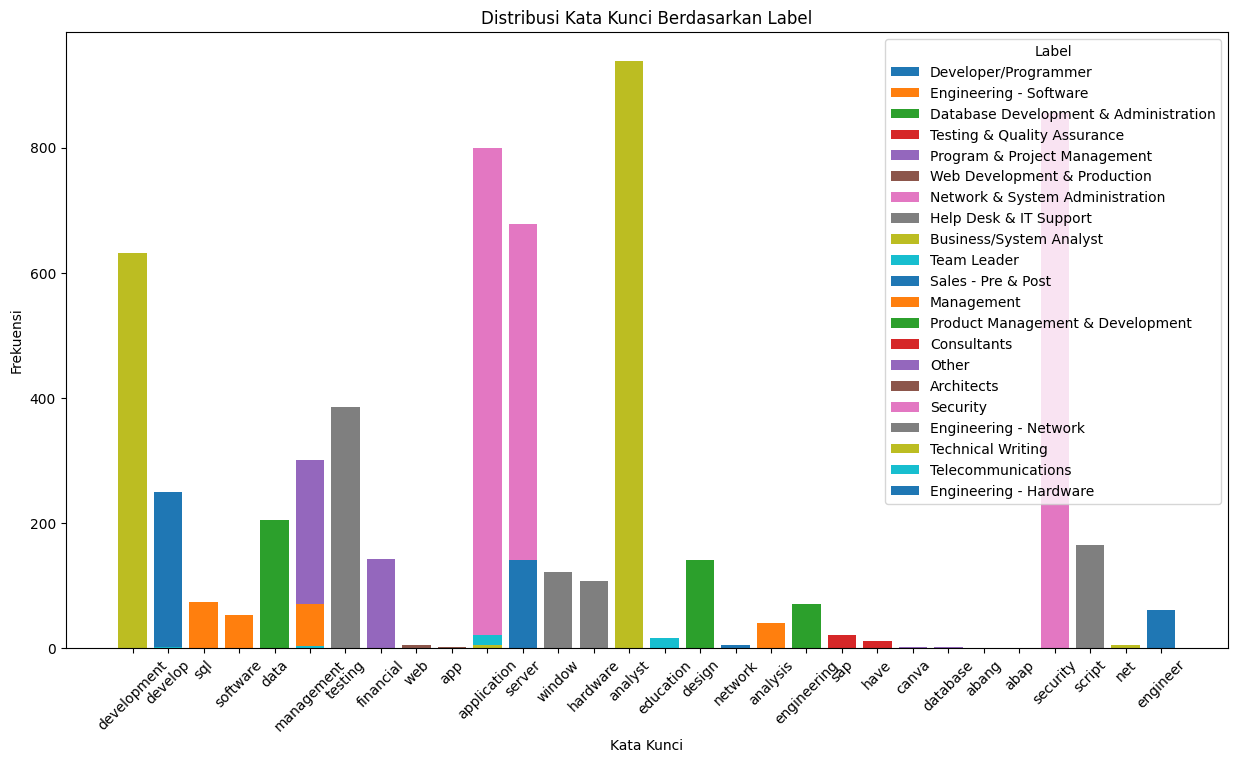

In [11]:
# Menggunakan CountVectorizer untuk menghitung frekuensi kata
vectorizer = CountVectorizer()
df_selected['result_descriptions'] = df_selected['result_descriptions'].fillna('')
X_vec = vectorizer.fit_transform(df_selected['result_descriptions'])
word_count = pd.DataFrame(X_vec.toarray(), columns=vectorizer.get_feature_names_out())
word_count['Label'] = df_selected['subcategory']

# Menggabungkan frekuensi kata dengan label
word_count_grouped = word_count.groupby('Label').sum().reset_index()

# Meletakkan kolom 'Label' di baris paling atas
df_keyword_distribution = word_count_grouped.melt(id_vars="Label", var_name="Kata Kunci", value_name="Frekuensi")

# Mengurutkan berdasarkan label dan frekuensi
df_keyword_distribution = df_keyword_distribution.sort_values(by=["Label", "Frekuensi"], ascending=False)

print(df_keyword_distribution)

# Memilih 10 kata teratas untuk setiap label
top_keywords = df_keyword_distribution.groupby('Label').head(2).reset_index(drop=True)

import matplotlib.pyplot as plt

# Plotting the distribution of keywords for each label
plt.figure(figsize=(15, 8))
for label in word_count['Label'].unique():
    subset = top_keywords[top_keywords['Label'] == label]
    plt.bar(subset['Kata Kunci'], subset['Frekuensi'], label=label)

plt.title('Distribusi Kata Kunci Berdasarkan Label')
plt.xlabel('Kata Kunci')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)
plt.legend(title='Label')
plt.show()



In [8]:
# Mengisi np.nan dengan string kosong
df_selected['result_descriptions'] = df_selected['result_descriptions'].fillna('')

labels = y.unique()

# Menggunakan CountVectorizer untuk menghitung frekuensi kata
vectorizer = CountVectorizer()
X_counts = vectorizer.fit_transform(X_train)

# Menyusun DataFrame hasil
results = []

for label in labels:
    label_texts = df_selected[df_selected['subcategory'] == label]['result_descriptions']
    label_counts = vectorizer.transform(label_texts)
    words_freq = X_counts.sum(axis=0)
    words_freq_dict = [(word, words_freq[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq_sorted = sorted(words_freq_dict, key=lambda x: x[1], reverse=True)
    results.extend([(word, freq, label) for word, freq in words_freq_sorted])  # Ambil 10 kata teratas per label

# Menyusun DataFrame untuk kata-kata yang paling sering muncul beserta label kelasnya
common_words_df = pd.DataFrame(results, columns=['Word', 'Frequency', 'Label'])

common_words_df.head(20)

,Word,Frequency,Label
0,management,1364,Developer/Programmer
1,application,1212,Developer/Programmer
2,security,1199,Developer/Programmer
3,design,1189,Developer/Programmer
4,server,1182,Developer/Programmer
5,software,1176,Developer/Programmer
6,analyst,1100,Developer/Programmer
7,development,1014,Developer/Programmer
8,manage,1010,Developer/Programmer
9,develop,916,Developer/Programmer


3) Evaluasi Model (Assess Model)

Measure Evaluation

In [13]:
# Evaluasi model
accuracy = accuracy_score(y_test_encoded, y_train_encoded)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test_encoded, y_train_encoded))

Accuracy: 86.75%

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.78      0.99      0.88       161
           2       0.67      1.00      0.80         2
           3       1.00      0.89      0.94        18
           4       0.94      0.85      0.89        40
           5       1.00      1.00      1.00         8
           6       1.00      0.95      0.98        21
           7       1.00      0.78      0.88         9
           8       0.92      0.58      0.71        19
           9       0.60      0.43      0.50         7
          10       0.89      0.75      0.81       104
          12       1.00      1.00      1.00         5
          13       1.00      0.83      0.91        18
          14       0.00      0.00      0.00         2
          15       0.97      0.97      0.97        40
          16       1.00      0.67      0.80         3
          19       0.86      0.67      0

d:\Program Files\Python\python378\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Program Files\Python\python378\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Program Files\Python\python378\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- Confusion Matrix

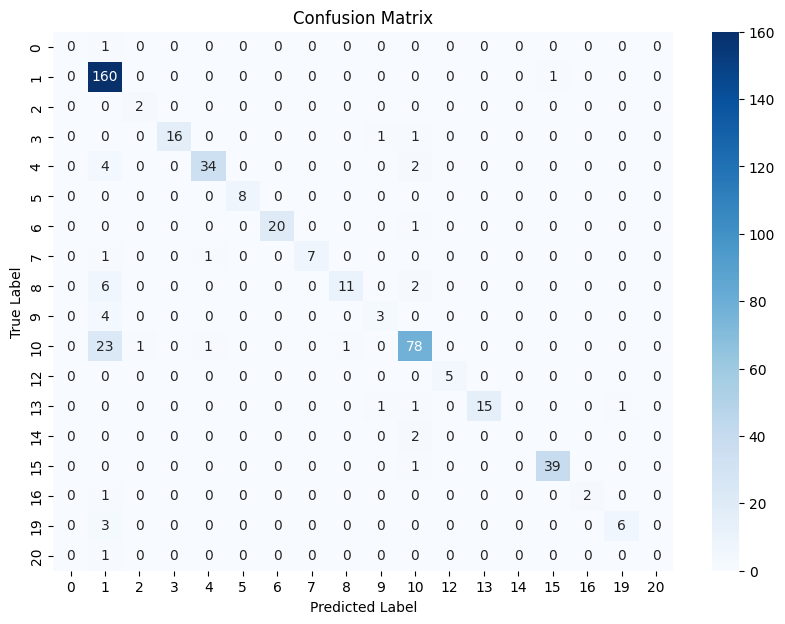

In [14]:
# Membuat confusion matrix
cm = confusion_matrix(y_test_encoded, y_train_encoded)

# Menentukan semua label yang ada
all_labels = np.unique(np.concatenate((y_test_encoded, y_train_encoded)))

# Membuat plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=all_labels, yticklabels=all_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


- Evalusi RMSE, MAE, MAPE, dan R2

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# MAE - Mean Absolute Error
mae = mean_absolute_error(y_test_encoded, y_train_encoded)

# MAPE - Mean Absolute Percentage Error (Perlu menangani nilai nol)
y_true_array = np.array(y_test_encoded)
y_pred_array = np.array(y_train_encoded)
mape = np.mean(np.abs((y_true_array - y_pred_array) / np.clip(y_true_array, 1e-10, None))) * 100

# MSE - Mean Squared Error
mse = mean_squared_error(y_test_encoded, y_train_encoded)

# RMSE - Root Mean Squared Error
rmse = np.sqrt(mse)

# R² - Coefficient of Determination
r2 = r2_score(y_test_encoded, y_train_encoded)

# Menampilkan hasil
print(f'MAE: {mae:.4f}')
print(f'MAPE: {mape:.4f}%')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

MAE: 1.0256
MAPE: 2136752150.5397%
MSE: 9.9402
RMSE: 3.1528
R²: 0.6303


# Barrier

In [16]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# Asumsi df_selected, X_train, y, dan langkah-langkah sebelumnya sudah dilakukan

# Mengisi np.nan dengan string kosong
df_selected['result_descriptions'] = df_selected['result_descriptions'].fillna('')

# Pilih label yang ingin ditampilkan (ganti 'label_yang_diinginkan' dengan label yang Anda inginkan)
selected_label = 'Business/System Analyst'

# Filter df_selected untuk label yang dipilih
df_filtered = df_selected[df_selected['subcategory'] == selected_label]

# Menggunakan CountVectorizer untuk menghitung frekuensi kata
vectorizer = CountVectorizer()
X_counts = vectorizer.fit_transform(df_filtered['result_descriptions'])

# Menyusun DataFrame hasil
words_freq = X_counts.sum(axis=0)
words_freq_dict = [(word, words_freq[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq_sorted = sorted(words_freq_dict, key=lambda x: x[1], reverse=True)

# Menyusun DataFrame untuk kata-kata yang paling sering muncul
result_df = pd.DataFrame(words_freq_sorted, columns=['Word', 'Frequency'])

# Menambahkan kolom Label
result_df['Label'] = selected_label

# Menghitung total frekuensi semua kata untuk label ini
total_word_count = result_df['Frequency'].sum()

# Menghitung persentase distribusi dalam label ini
result_df['Percentage'] = (result_df['Frequency'] / total_word_count) * 100

result_df.head(10)

,Word,Frequency,Label,Percentage
0,analyst,938,Business/System Analyst,8.989841
1,development,631,Business/System Analyst,6.047537
2,design,551,Business/System Analyst,5.280813
3,management,412,Business/System Analyst,3.948629
4,analysis,370,Business/System Analyst,3.546099
5,programming,357,Business/System Analyst,3.421507
6,software,315,Business/System Analyst,3.018976
7,application,285,Business/System Analyst,2.731455
8,query,276,Business/System Analyst,2.645198
9,analyze,263,Business/System Analyst,2.520606


In [15]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# Assume df_selected, X_train, y, and previous steps have been done

# Fill np.nan with empty string
df_selected['result_descriptions'] = df_selected['result_descriptions'].fillna('')

# List of labels you want to analyze
selected_labels = ['Developer/Programmer', 'Engineering - Software',
 'Database Development & Administration', 'Testing & Quality Assurance',
 'Program & Project Management', 'Web Development & Production',
 'Network & System Administration', 'Help Desk & IT Support',
 'Business/System Analyst', 'Team Leader', 'Sales - Pre & Post', 'Management',
 'Product Management & Development', 'Consultants', 'Other' ,'Architects',
 'Security', 'Engineering - Network', 'Technical Writing',
 'Telecommunications' ,'Engineering - Hardware']  # Add or modify labels as needed

# Initialize an empty DataFrame to store all results
all_results_df = pd.DataFrame()

for selected_label in selected_labels:
    print(f"\nProcessing label: {selected_label}")
    
    # Filter df_selected for the current label
    df_filtered = df_selected[df_selected['subcategory'] == selected_label]
    
    print(f"Number of entries for this label: {len(df_filtered)}")
    
    if len(df_filtered) == 0:
        print(f"No data found for label: {selected_label}")
        continue
    
    # Print a sample of the text to check content
    print("Sample text:")
    print(df_filtered['result_descriptions'].iloc[0][:200] + "...")  # Print first 200 characters of the first entry
    
    # Use CountVectorizer to count word frequencies
    vectorizer = CountVectorizer(min_df=1, stop_words='english')  # Adjust parameters as needed
    
    try:
        X_counts = vectorizer.fit_transform(df_filtered['result_descriptions'])
    except ValueError as e:
        print(f"Error processing label {selected_label}: {str(e)}")
        print("Skipping this label.")
        continue

    # Get the vocabulary
    vocabulary = vectorizer.get_feature_names_out()
    print(f"Number of unique words: {len(vocabulary)}")
    if len(vocabulary) > 0:
        print(f"Sample words: {', '.join(vocabulary[:10])}")  # Print first 10 words

    # Compile results
    words_freq = X_counts.sum(axis=0)
    words_freq_dict = [(word, words_freq[0, idx]) for idx, word in enumerate(vocabulary)]
    words_freq_sorted = sorted(words_freq_dict, key=lambda x: x[1], reverse=True)

    # Create DataFrame for most frequent words
    result_df = pd.DataFrame(words_freq_sorted, columns=['Word', 'Frequency'])

    # Add Label column
    result_df['Label'] = selected_label

    # Calculate total word frequency for this label
    total_word_count = result_df['Frequency'].sum()

    # Calculate percentage distribution within this label
    result_df['Percentage'] = (result_df['Frequency'] / total_word_count) * 100

    # Append results to the all_results_df
    all_results_df = pd.concat([all_results_df, result_df], ignore_index=True)

# Sort the combined results by Frequency in descending order
all_results_df = all_results_df.sort_values('Frequency', ascending=False)

# Display the top 10 results for each label
for label in selected_labels:
    print(f"\nTop 10 words for {label}:")
    label_results = all_results_df[all_results_df['Label'] == label]
    if len(label_results) > 0:
        print(label_results.head(10))
    else:
        print("No results available for this label.")

# Optionally, you can save the entire result to a CSV file
# all_results_df.to_csv('word_frequency_analysis.csv', index=False)


Processing label: Developer/Programmer
Number of entries for this label: 198
Sample text:
science engineering app development develop microsoft office microsoft outlook drive microsoft microsoft microsoft app javascript office monitor develop problemsolving app developer develop maintain a...
Number of unique words: 377
Sample words: abang, abap, accounting, actually, administration, administrator, adobe, agile, ajax, algorithm

Processing label: Engineering - Software
Number of entries for this label: 49
Sample text:
develop uiux design web design design backend developer application design web maintain design develop frontend javascript html css backend web api nextjs git jira crum...
Number of unique words: 117
Sample words: abap, admin, agile, algorithm, analytical, analyze, api, apis, application, architect

Processing label: Database Development & Administration
Number of entries for this label: 95
Sample text:
education analyze financial google develop maintain database reporti

In [17]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# Assume df_selected, X_train, y, and previous steps have been done

# Fill np.nan with empty string
df_selected['result_descriptions'] = df_selected['result_descriptions'].fillna('')

# List of labels you want to analyze
selected_labels = ['Developer/Programmer', 'Engineering - Software',
 'Database Development & Administration', 'Testing & Quality Assurance',
 'Program & Project Management', 'Web Development & Production',
 'Network & System Administration', 'Help Desk & IT Support',
 'Business/System Analyst', 'Team Leader', 'Sales - Pre & Post', 'Management',
 'Product Management & Development', 'Consultants', 'Other' ,'Architects',
 'Security', 'Engineering - Network', 'Technical Writing',
 'Telecommunications' ,'Engineering - Hardware']  # Add or modify labels as needed

# Initialize an empty DataFrame to store all results
all_results_df = pd.DataFrame()

for selected_label in selected_labels:
    print(f"\nProcessing label: {selected_label}")
    
    # Filter df_selected for the current label
    df_filtered = df_selected[df_selected['subcategory'] == selected_label]
    
    print(f"Number of entries for this label: {len(df_filtered)}")
    
    if len(df_filtered) == 0:
        print(f"No data found for label: {selected_label}")
        continue
    
    # Print a sample of the text to check content
    print("Sample text:")
    print(df_filtered['result_descriptions'].iloc[0][:200] + "...")  # Print first 200 characters of the first entry
    
    # Use CountVectorizer to count word frequencies
    vectorizer = CountVectorizer(min_df=1, stop_words='english')  # Adjust parameters as needed
    
    try:
        X_counts = vectorizer.fit_transform(df_filtered['result_descriptions'])
    except ValueError as e:
        print(f"Error processing label {selected_label}: {str(e)}")
        print("Skipping this label.")
        continue

    # Get the vocabulary
    vocabulary = vectorizer.get_feature_names_out()
    print(f"Number of unique words: {len(vocabulary)}")
    if len(vocabulary) > 0:
        print(f"Sample words: {', '.join(vocabulary[:10])}")  # Print first 10 words
    else:
        print("No words found in the vocabulary. Skipping this label.")
        continue

    # Compile results
    words_freq = X_counts.sum(axis=0)
    words_freq_dict = [(word, words_freq[0, idx]) for idx, word in enumerate(vocabulary)]
    words_freq_sorted = sorted(words_freq_dict, key=lambda x: x[1], reverse=True)

    # Create DataFrame for most frequent words
    result_df = pd.DataFrame(words_freq_sorted, columns=['Word', 'Frequency'])

    # Add Label column
    result_df['Label'] = selected_label

    # Calculate total word frequency for this label
    total_word_count = result_df['Frequency'].sum()

    # Calculate percentage distribution within this label
    result_df['Percentage'] = (result_df['Frequency'] / total_word_count) * 100

    # Append results to the all_results_df
    all_results_df = pd.concat([all_results_df, result_df], ignore_index=True)

# Check if all_results_df is empty
if all_results_df.empty:
    print("\nNo results were generated for any label.")
else:
    # Sort the combined results by Frequency in descending order
    all_results_df = all_results_df.sort_values('Frequency', ascending=False)

    # Display the top 10 results for each label
    for label in selected_labels:
        print(f"\nTop 10 words for {label}:")
        label_results = all_results_df[all_results_df['Label'] == label]
        if len(label_results) > 0:
            print(label_results.head(10))
        else:
            print("No results available for this label.")

# Print the structure of all_results_df
print("\nStructure of all_results_df:")
print(all_results_df.info())

# Optionally, you can save the entire result to a CSV file
# all_results_df.to_csv('word_frequency_analysis.csv', index=False)


Processing label: Developer/Programmer
Number of entries for this label: 198
Sample text:
science engineering app development develop microsoft office microsoft outlook drive microsoft microsoft microsoft app javascript office monitor develop problemsolving app developer develop maintain a...
Number of unique words: 377
Sample words: abang, abap, accounting, actually, administration, administrator, adobe, agile, ajax, algorithm

Processing label: Engineering - Software
Number of entries for this label: 49
Sample text:
develop uiux design web design design backend developer application design web maintain design develop frontend javascript html css backend web api nextjs git jira crum...
Number of unique words: 117
Sample words: abap, admin, agile, algorithm, analytical, analyze, api, apis, application, architect

Processing label: Database Development & Administration
Number of entries for this label: 95
Sample text:
education analyze financial google develop maintain database reporti

In [18]:
all_results_df

,Word,Frequency,Label,Percentage
1163,analyst,938,Business/System Analyst,9.100611
1543,security,856,Security,13.909652
848,application,800,Network & System Administration,5.994755
849,server,678,Network & System Administration,5.080555
1164,development,631,Business/System Analyst,6.122053
...,...,...,...,...
1144,merchantcustomer,1,Help Desk & IT Support,0.056211
1145,microsoft,1,Help Desk & IT Support,0.056211
1146,mikrotik,1,Help Desk & IT Support,0.056211
1147,miss,1,Help Desk & IT Support,0.056211


C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


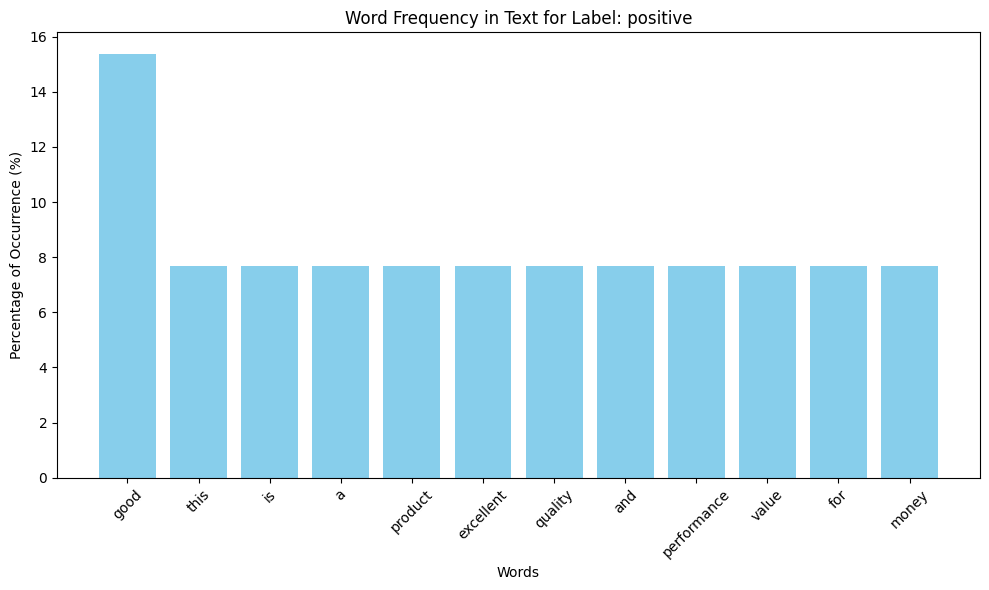

,word,count,percentage
3,good,2,15.384615
0,this,1,7.692308
1,is,1,7.692308
2,a,1,7.692308
4,product,1,7.692308
5,excellent,1,7.692308
6,quality,1,7.692308
7,and,1,7.692308
8,performance,1,7.692308
9,value,1,7.692308


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re

# Contoh dataset
data = {
    'text': ['This is a good product', 'Bad quality and not recommended', 
             'Excellent quality and performance', 'This is bad', 'Good value for money'],
    'label': ['positive', 'negative', 'positive', 'negative', 'positive']
}

# Membuat dataframe
df = pd.DataFrame(data)

# Ambil subset data dengan label tertentu, misal 'positive'
label = 'positive'
df_label = df[df['label'] == label]

# Preprocessing: mengubah ke huruf kecil dan menghapus tanda baca
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Menghapus tanda baca
    return text

df_label['clean_text'] = df_label['text'].apply(preprocess_text)

# Menggabungkan semua teks untuk dihitung frekuensi kata
all_text = ' '.join(df_label['clean_text'])

# Tokenisasi teks (memisahkan kata-kata)
words = all_text.split()

# Hitung frekuensi kemunculan setiap kata
word_counts = Counter(words)

# Ubah menjadi dataframe untuk memudahkan visualisasi
word_freq_df = pd.DataFrame(word_counts.items(), columns=['word', 'count'])

# Hitung persentase kemunculan
total_words = word_freq_df['count'].sum()
word_freq_df['percentage'] = (word_freq_df['count'] / total_words) * 100

# Sortir berdasarkan frekuensi terbesar
word_freq_df = word_freq_df.sort_values(by='count', ascending=False)

# Visualisasi frekuensi kata dalam label
plt.figure(figsize=(10, 6))
plt.bar(word_freq_df['word'], word_freq_df['percentage'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Percentage of Occurrence (%)')
plt.title(f'Word Frequency in Text for Label: {label}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

word_freq_df

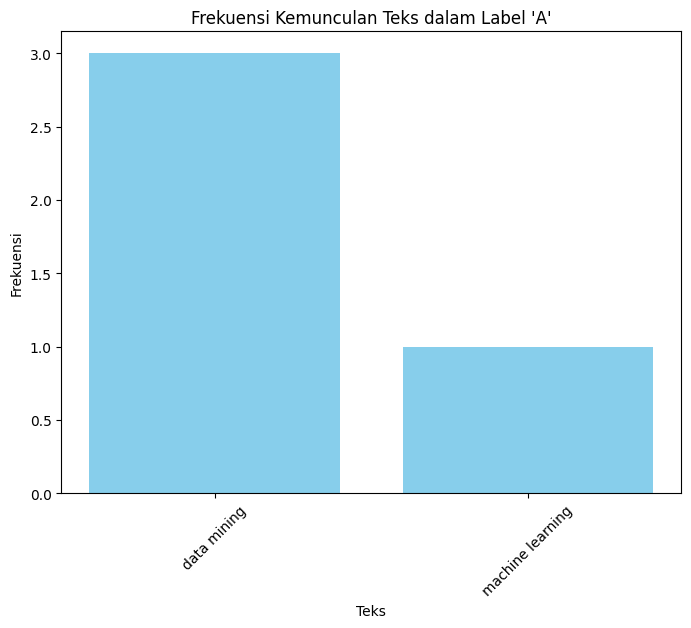

               teks  frekuensi  persentase
0       data mining          3        75.0
1  machine learning          1        25.0


In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Contoh dataset
data = {
    'teks': ['data mining', 'machine learning', 'data mining', 'deep learning', 'machine learning', 'data mining'],
    'label': ['A', 'B', 'A', 'B', 'A', 'A']
}

# Membuat dataframe
df = pd.DataFrame(data)

# Ambil data dengan label yang dipilih (misalnya, 'A')
label_terpilih = 'A'
df_label = df[df['label'] == label_terpilih]

# Hitung frekuensi kemunculan teks
frekuensi_teks = df_label['teks'].value_counts().reset_index()
frekuensi_teks.columns = ['teks', 'frekuensi']

# Hitung persentase kemunculan teks
frekuensi_teks['persentase'] = (frekuensi_teks['frekuensi'] / frekuensi_teks['frekuensi'].sum()) * 100

# Visualisasi frekuensi kemunculan teks
plt.figure(figsize=(8, 6))
plt.bar(frekuensi_teks['teks'], frekuensi_teks['frekuensi'], color='skyblue')
plt.title(f"Frekuensi Kemunculan Teks dalam Label '{label_terpilih}'")
plt.xlabel('Teks')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)
plt.show()

# Simpan hasil dalam dataframe
print(frekuensi_teks)


In [19]:
# Menyimpan dataset yang sudah diubah
#all_results_df.to_csv("hasil modeling/new.csv")

barrier

In [20]:
# Menyimpan dataset yang sudah diubah
#df_keyword_distribution.to_csv("hasil modeling/common_word(2).csv")